In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer, make_blobs, make_moons
from sklearn.model_selection import train_test_split

# Classificadores
from sklearn.linear_model import Perceptron

# Biblioteca para criar classificador.
from sklearn.base import BaseEstimator, ClassifierMixin

# Biblioteca para visualização.
from mlxtend.plotting import plot_decision_regions

## Duas Luas

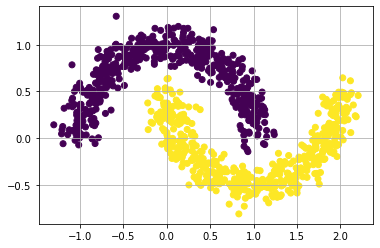

In [2]:
X, y = make_moons(n_samples=1000, noise=.1, random_state=1)
plt.scatter(X[:,0],X[:,1],c=y)
plt.grid(True)

In [4]:
class MLMP(BaseEstimator, ClassifierMixin):
    
    def __init__(self, verbose = False, myInf = 1.e+10):
        self.verbose = verbose
        self.myInf = 1.e+10 
        
    def fit(self, Xtr, ytr):
        
        Xtr = np.hstack([Xtr,-Xtr])
        
        K, N = Xtr.shape
        self.boxes_ = []
        
# #         Inicializando os pesos como "infinito"
#         self.w_ = (self.myInf)*np.ones(2,)
#         if self.verbose:
#             print("Pesos iniciais:",self.w_)
        
#         for xi in range(K):
#             compara = ((Xtr[xi,:] + self.w_)>0) > ytr[xi]
#             self.w_[compara] = -Xtr[xi,compara]
#             if self.verbose:
#                 print("Pesos para atualizar:",compara)
#                 print("Pesos atualizados:",self.w_)       
        return self
    
    def decision_function(self,X):
        X = np.hstack([X,-X])
        return np.max(np.vstack([np.min(X+w, axis=1) for w in clf.boxes_]),axis=0)
    
    def predict(self,X):
        return self.decision_function(X)>0

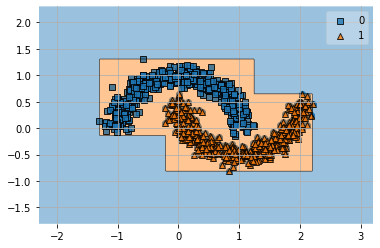

In [5]:
clf = MLMP()

ind = (y==1)
plt.scatter(X[ind,0],X[ind,1])
plt.grid(True)
w1 = np.hstack([-np.min(X[ind,:],axis=0),np.max(X[ind,:],axis=0)])

ind = (y==0)
plt.scatter(X[ind,0],X[ind,1])
plt.grid(True)
w0 = np.hstack([-np.min(X[ind,:],axis=0),np.max(X[ind,:],axis=0)])

clf.boxes_ = [w0,w1]
plot_decision_regions(X,y,clf)

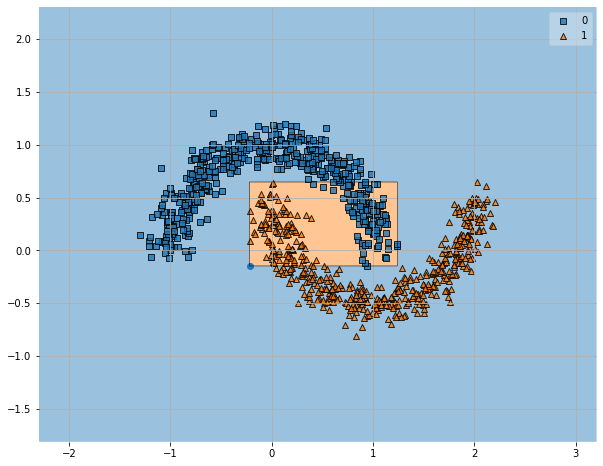

In [6]:
N = X.shape[1]
w = np.minimum(w0,w1)
clf.boxes_ = [w]
plt.figure(figsize=(10,8))
plot_decision_regions(X,y,clf)
plt.grid(True)

plt.scatter(-w[0],-w[1])

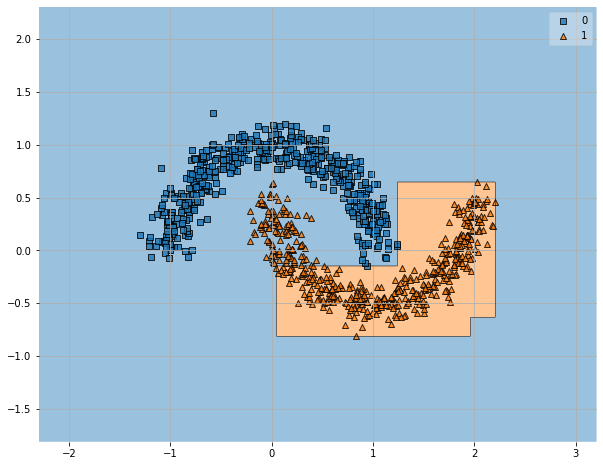

In [7]:
ind = np.logical_and((y==1),(X[:,1]<-w[1]))
w3 = np.hstack([-np.min(X[ind,:],axis=0),np.max(X[ind,:],axis=0)])

ind = np.logical_and((y==1),(X[:,0]>w[2]))
w4 = np.hstack([-np.min(X[ind,:],axis=0),np.max(X[ind,:],axis=0)])


clf.boxes_ = [w3,w4]
plt.figure(figsize=(10,8))
plot_decision_regions(X,y,clf)
plt.grid(True)

# Rascunho

## Make Blobs

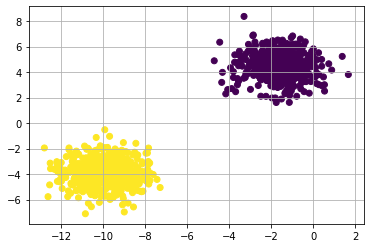

In [3]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1)
# y = 1-y
plt.scatter(X[:,0],X[:,1],c=y)
plt.grid(True)

In [4]:
X, y = load_breast_cancer(return_X_y = True)
y = 1-y

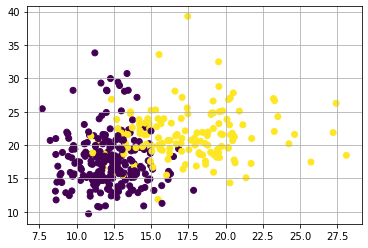

In [5]:
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.33, random_state=42)
plt.scatter(Xtr[:,0],Xtr[:,1],c=ytr)
plt.grid(True)

In [6]:
K, N = Xtr.shape
K, N

(381, 30)

In [7]:
class SLMP(BaseEstimator, ClassifierMixin):
    
    def __init__(self, verbose = False, myInf = 1.e+10):
        self.verbose = verbose
        self.myInf = 1.e+10 
        
    def fit(self, Xtr, ytr):
        
        K, N = Xtr.shape
        self.w_ = -np.max(Xtr[ytr==0,:],axis=0)
        
# #         Inicializando os pesos como "infinito"
#         self.w_ = (self.myInf)*np.ones(2,)
#         if self.verbose:
#             print("Pesos iniciais:",self.w_)
        
#         for xi in range(K):
#             compara = ((Xtr[xi,:] + self.w_)>0) > ytr[xi]
#             self.w_[compara] = -Xtr[xi,compara]
#             if self.verbose:
#                 print("Pesos para atualizar:",compara)
#                 print("Pesos atualizados:",self.w_)       
        return self
    
    def decision_function(self,X):
        return np.max(X+self.w_,axis=1)
    
    def predict(self,X):
        return self.decision_function(X)>0

In [8]:
class SLMPbox(BaseEstimator, ClassifierMixin):
    
    def __init__(self, verbose = False, myInf = 1.e+10):
        self.verbose = verbose
        self.myInf = 1.e+10 
        
    def fit(self, Xtr, ytr):
        
        Xtr = np.hstack([Xtr,-Xtr])
        
        K, N = Xtr.shape
        self.w_ = -np.max(Xtr[ytr==0,:],axis=0)
        
# #         Inicializando os pesos como "infinito"
#         self.w_ = (self.myInf)*np.ones(2,)
#         if self.verbose:
#             print("Pesos iniciais:",self.w_)
        
#         for xi in range(K):
#             compara = ((Xtr[xi,:] + self.w_)>0) > ytr[xi]
#             self.w_[compara] = -Xtr[xi,compara]
#             if self.verbose:
#                 print("Pesos para atualizar:",compara)
#                 print("Pesos atualizados:",self.w_)       
        return self
    
    def decision_function(self,X):
        X = np.hstack([X,-X])
        return np.max(X+self.w_,axis=1)
    
    def predict(self,X):
        return self.decision_function(X)>0

ValueError: Filler values must be provided when X has more than 2 training features.

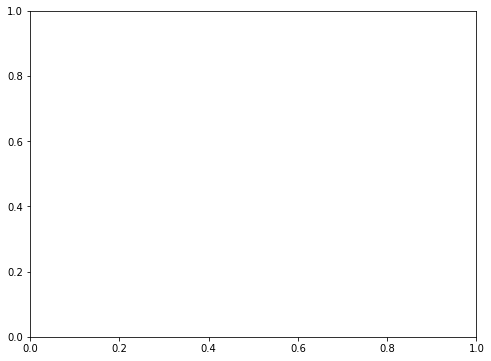

In [9]:
clf = SLMP()
clf.fit(Xtr,ytr)

plt.figure(figsize=(8,6))
plot_decision_regions(Xte,yte,clf=clf)
plt.grid(True)

print("Acuracias:\n Treino:", clf.score(Xtr,ytr),"\n  Teste:", clf.score(Xte,yte))

In [ ]:
clf = SLMPbox()
clf.fit(Xtr,ytr)

plt.figure(figsize=(8,6))
plot_decision_regions(Xte,yte,clf=clf)
plt.grid(True)

print("Acuracias:\n Treino:", clf.score(Xtr,ytr),"\n  Teste:", clf.score(Xte,yte))

In [ ]:
clf = SLMP()
clf.fit(Xtr,ytr)

plt.figure(figsize=(8,6))
for xi in range(Xtr.shape[0]):
    
    
    plot_decision_regions(Xte,yte,clf=clf)
    plt.grid(True)
    print("Acuracias:\n Treino:", clf.score(Xtr,ytr),"\n  Teste:", clf.score(Xte,yte))

In [ ]:
clf = Perceptron()
clf.fit(Xtr,ytr)

plt.figure(figsize=(8,6))
plot_decision_regions(Xte,yte,clf=clf)
plt.grid(True)

print("Acuracias:\n Treino:", clf.score(Xtr,ytr),"\n  Teste:", clf.score(Xte,yte))

In [ ]:
np.max(Xtr+clf.w_,axis=1)

### Rascunho

In [ ]:
xi=7
# Xtr[xi,:], Xtr[xi,:]+w, 
print(w)
compara = ((Xtr[xi,:] + w)>0) > ytr[xi]
print(compara)
w[compara] = -Xtr[xi,compara]
print(w)

In [ ]:
np.hstack([Xtr,-Xtr])

## Ideias para interpretação geométrica do SLMP

Entrada da rede: x

Saída (classe 0/1): 

$$y = f \left(\max_{i=1:N} \{w_i+x_i\} \right) = f \left(\bigvee_{i=1}^N \{w_i+x_i\} \right),$$
em que $f(t) = 1$ se $t>0$ e $f(t)=0$ caso contrário.

Devemos determinar quando $y=0$, ou seja, $$\max_{i=1:N} \{w_i+x_i\} \leq 0.$$
Equivalentemente, $$ x_i \leq -w_i, \quad i=1,\ldots,N.$$

## Formulação Dual: Ideias para interpretação geométrica do SLMP

Entrada da rede: x

Saída (classe 0/1): 

$$y = f \left(\min_{i=1:N} \{w_i+x_i\} \right) = f \left(\bigwedge_{i=1}^N \{w_i+x_i\} \right),$$
em que $f(t) = 0$ se $t<0$ e $f(t)=1$ caso contrário.

Devemos determinar quando $y=1$, ou seja, $$\min_{i=1:N} \{w_i+x_i\} \geq 0.$$
Equivalentemente, $$ x_i \geq -w_i, \quad i=1,\ldots,N.$$

## Modelo com hiper-caixa

Devemos determinar quando $y=1$, ou seja, $$\min_{i=1:N} \{[u_i,v_i]+[x_i,-x_i]\} \geq 0.$$
Equivalentemente, $$ x_i \geq -u_i \quad \mbox{e} \quad -x_i \geq -v_i \quad i=1,\ldots,N,$$

ou ainda,
Equivalentemente, $$ -u_i \leq x_i \quad \mbox{e} \quad x_i \leq v_i \quad i=1,\ldots,N.$$

Logo,
$$ -u_i \leq x_i \leq v_i \quad i=1,\ldots,N,$$
ou ainda,
$$ a_i \leq x_i \leq b_i \quad i=1,\ldots,N.$$

## Relembrando lógica:

### AND (mínimo): 
0 AND 0 = 0,
0 AND 1 = 0,
1 AND 0 = 0,
1 AND 1 = 1.

### OR (máximo): 
0 OR 0 = 0,
0 OR 1 = 1, 
1 OR 0 = 1, 
1 OR 1 = 1.

### Lei de De Morgan:
$x^c AND y^c = (x OR y)^c$

## Módulo Morfológico:

$$y = \min_{i=1:N} \{[u_i,v_i]+[x_i,−x_i]\} = \min\{\min_{i=1:N} \{u_i+x_i\},\min_{i=1:N} \{v_i−x_i\}\}.$$

## Tarefa: Implementar uma rede com múltiplas camadas. 

A primeira camada tem módulos que correspondem a hiper-caixas em paralelo. A camada de saída calcula o máximo (ou mínimo) da saída dos módulos.

Não implementar o treinamento!